## Regularization in regression
* L1 regualrization
* L2 regualrization

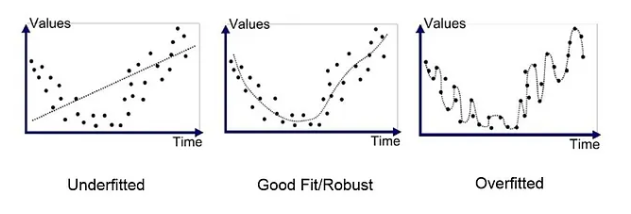

## Underfit

Model has 'high train error' and 'high test error'

In [146]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [5]:
# loading the data

ice_cream = pd.read_csv('../datasets/ice_cream_sales_data.csv')
ice_cream.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [7]:
ice_cream.columns = ['temp', 'sales']
ice_cream.head()

,temp,sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [8]:
print(f"Shape of the data: {ice_cream.shape}")

Shape of the data: (49, 2)


Text(0.5, 1.0, 'Rel b/w temp and sales')

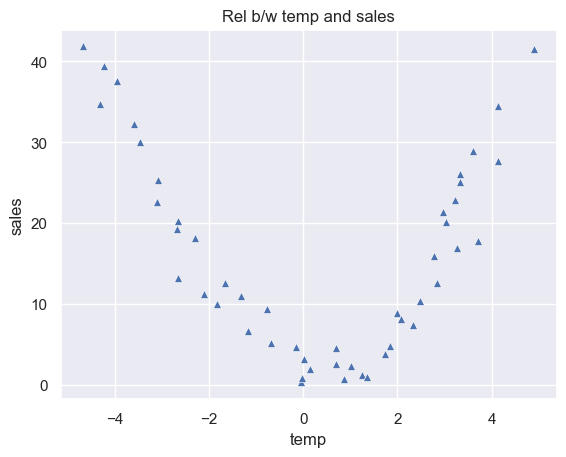

In [12]:
# observing the data

sns.set_theme(style='darkgrid')
sns.scatterplot(ice_cream, x='temp', y='sales', marker = '^')
plt.title("Rel b/w temp and sales")

* we can observe that, the relation is polunomical (line x^2)
* So a linear regression doesn't perform well ,and leads to underfitting

### **fitting a linear model and getting the weights**


In [59]:
X = ice_cream[['temp']].to_numpy()
y = ice_cream['sales'].to_numpy()

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print(f"Train size: {x_train.shape[0]}")
print(f"Test size: {x_test.shape[0]}")

Train size: 39
Test size: 10


Text(0.5, 1.0, 'Rel b/w temp and sales')

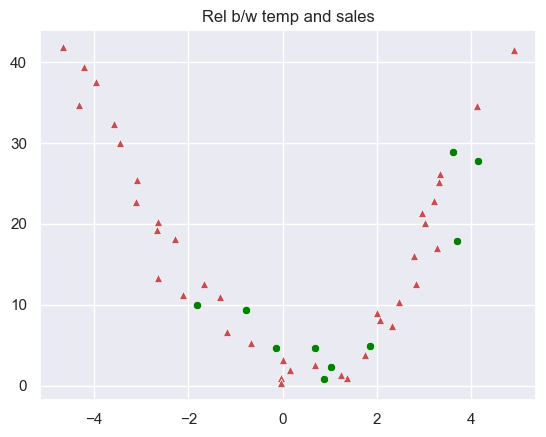

In [62]:
# observing the data

sns.set_theme(style='darkgrid')
sns.scatterplot(x=x_train.reshape(-1), y=y_train, marker = '^', color = 'r')
sns.scatterplot(x=x_test.reshape(-1), y=y_test, color = 'green')
plt.title("Rel b/w temp and sales")

In [63]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [64]:
# getting the slope and intercept value

print(f"slope: {lin_model.coef_}")
print(f"inercept: {lin_model.intercept_}")

slope: [-1.14658686]
inercept: 17.139213127718417


In [65]:
# train error and test error

y_train_pred = lin_model.predict(x_train)
y_test_pred = lin_model.predict(x_test)

print(f"Train loss: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test loss: {mean_squared_error(y_test, y_test_pred)}")

Train loss: 143.33160093981343
Test loss: 149.32629119325185


* We can observe that, both the losses are high
* So, the model is uderfitted

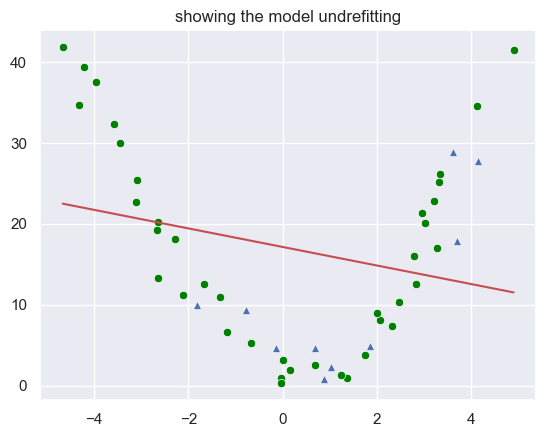

In [66]:
# visualizing

line = lin_model.coef_[0]*x_train.reshape(-1)+lin_model.intercept_

sns.scatterplot(x = x_train.reshape(-1),y = y_train, color = 'green')
sns.scatterplot(x = x_test.reshape(-1),y = y_test, marker = '^')
sns.lineplot(x = x_train.reshape(-1),y = line, color = 'r')
plt.title("showing the model undrefitting")
plt.show()

In [69]:
# some predictions

print(f"Original: {y_test[4]}")
print(f"Predicted: {lin_model.predict([x_test[4]])[0]}")

Original: 9.392968661109096
Predicted: 18.02590319685845


In [70]:
print(f"Original: {y_train[32]}")
print(f"Predicted: {lin_model.predict([x_train[32]])[0]}")

Original: 41.51482194316632
Predicted: 11.522047946653888


## Overfitting

* We will use a polynomial regression with different degrees combinations
* Will observe certain insights

In [50]:
# data
ice_cream = pd.read_csv('../datasets/ice_cream_sales_data.csv')

print(f"shape of the data: {ice_cream.shape}")
ice_cream.head()

shape of the data: (49, 2)


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [52]:
ice_cream.columns = ['temp', 'sales']

In [71]:
X = ice_cream[['temp']].to_numpy()
y = ice_cream['sales'].to_numpy()


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

print(f"train size: {x_train.shape[0]}")
print(f"test size: {x_test.shape[0]}")

train size: 39
test size: 10


Text(0.5, 1.0, 'Rel b/w temp and sales')

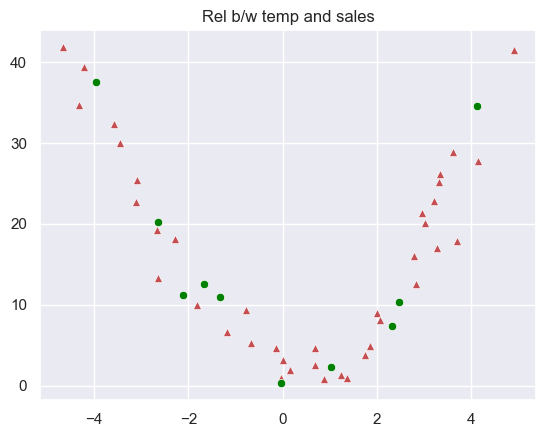

In [72]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=x_train.reshape(-1), y=y_train, marker = '^', color = 'r')
sns.scatterplot(x=x_test.reshape(-1), y=y_test, color = 'green')
plt.title("Rel b/w temp and sales")

### **polynomical with degree 2**

In [96]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
x_poly2 = poly2.fit_transform(x_train)

print(X[1])
print(x_poly2[1])

print(X.shape)
print(x_poly2.shape)

[-4.31655945]
[1.24071162 1.53936532]
(49, 1)
(39, 2)


In [97]:
poly_reg_2 = LinearRegression()
poly_reg_2.fit(x_poly2, y_train)

LinearRegression()

In [99]:
# gettting the polynomical weights => w_1*x^2 + w_2*x + w_0


coef_1, coef_2 = poly_reg_2.coef_
intercept = poly_reg_2.intercept_

print(f"Weights: {poly_reg_2.coef_}")
print(f"intercet: {poly_reg_2.intercept_}")

Weights: [-0.74232477  1.78910382]
intercet: 3.105561222661896


x^2 - 1.82952..

x - -0.8246

1 - 2.9177

In [104]:
# visualizing

line = coef_2*x_poly2[:, 1] + coef_1*x_poly2[:, 0] + intercept

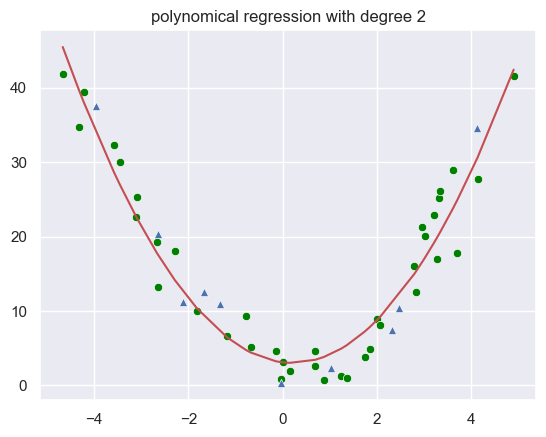

In [102]:
# poly visual

sns.scatterplot(x = x_train.reshape(-1),y = y_train, color = 'green')
sns.scatterplot(x = x_test.reshape(-1),y = y_test, marker = '^')
sns.lineplot(x = x_train.reshape(-1),y = line, color = 'r')
plt.title("polynomical regression with degree 2")
plt.show()

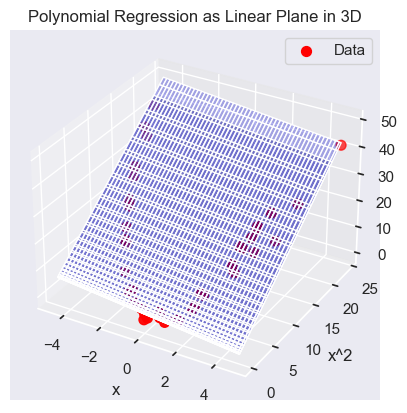

In [118]:
# linear visual

x = x_train.reshape(-1)
x_range = np.linspace(x.min(), x.max(), 100)
x1, x2 = np.meshgrid(x_range, x_range**2)
z = coef_2*x2 + coef_1*x1 + intercept

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1, x2, z, alpha=0.3, color="blue")
ax.scatter(x, x**2, y_train, color="red", s=50, label="Data")

ax.set_xlabel("x")
ax.set_ylabel("x^2")
ax.set_zlabel("y")
ax.set_title("Polynomial Regression as Linear Plane in 3D")
ax.legend()
plt.show()


In [119]:
# train error and test error

y_train_pred = poly_reg_2.predict(x_poly2)
y_test_pred = poly_reg_2.predict(poly2.transform(x_test))

print(f"Train loss: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test loss: {mean_squared_error(y_test, y_test_pred)}")

Train loss: 10.407032564188428
Test loss: 9.044218749365426


Train is very low when compared to above

Test loss also decreased

can observe that, both are comparatively low (this is good fit model)

### **polynomical with degree 3**

In [121]:

poly3 = PolynomialFeatures(degree=3, include_bias=False)
x_poly3 = poly3.fit_transform(x_train)

print(x_train[1])
print(x_poly3[1])

print(x_train.shape)
print(x_poly3.shape)


[1.24071162]
[1.24071162 1.53936532 1.90990844]
(39, 1)
(39, 3)


In [122]:
# training the model

poly_reg_3 = LinearRegression()
poly_reg_3.fit(x_poly3, y_train)

LinearRegression()

In [123]:
# gettting the polynomical weights => w_1*x^3 + w_2*x^2 + w_3*x + w_0


coef_1, coef_2, coef_3 = poly_reg_3.coef_
intercept = poly_reg_3.intercept_

print(f"Weights: {poly_reg_3.coef_}")
print(f"intercet: {poly_reg_3.intercept_}")

Weights: [-1.22985127  1.78380801  0.03698283]
intercet: 3.2403629146975756


visualizing


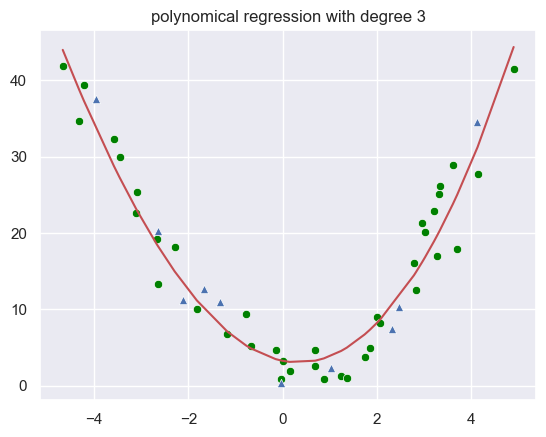

In [124]:
line = coef_3*x_poly3[:, 2] + coef_2*x_poly3[:, 1] + coef_1*x_poly3[:, 0] +intercept
# poly visual

sns.scatterplot(x = x_train.reshape(-1),y = y_train, color = 'green')
sns.scatterplot(x = x_test.reshape(-1),y = y_test, marker = '^')
sns.lineplot(x = x_train.reshape(-1),y = line, color = 'r')
plt.title("polynomical regression with degree 3")
plt.show()

In [125]:
# train error and test error

y_train_pred = poly_reg_3.predict(x_poly3)
y_test_pred = poly_reg_3.predict(poly3.transform(x_test))

print(f"Train loss: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test loss: {mean_squared_error(y_test, y_test_pred)}")

Train loss: 10.050648602409836
Test loss: 7.28965673234225


### Polynomial regression with degree 10

In [126]:
def train_polynomial_regression(X, y, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    return model, poly

In [129]:
def plot_polynomial_regression(X_train, y_train, X_test, y_test, model, poly):

    X_range = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
    y_pred_line = model.predict(poly.transform(X_range))

    y_train_pred = model.predict(poly.transform(X_train))
    y_test_pred = model.predict(poly.transform(X_test))
    
    sns.scatterplot(x=X_train.reshape(-1), y=y_train, color="green", label="Train")
    sns.scatterplot(x=X_test.reshape(-1), y=y_test, marker="^", label="Test")
    sns.lineplot(x=X_range.reshape(-1), y=y_pred_line, color="red", label="Polynomial fit")
    plt.title(f"Polynomial Regression (degree={poly.degree})")
    plt.legend()
    plt.show()
    
    print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")

In [137]:
def get_weights(model):
    print("Model weights are ")
    for i in model.coef_:
        print(round(i, 4), end=" ")
    print("\nModel intercept:")
    print(model.intercept_)

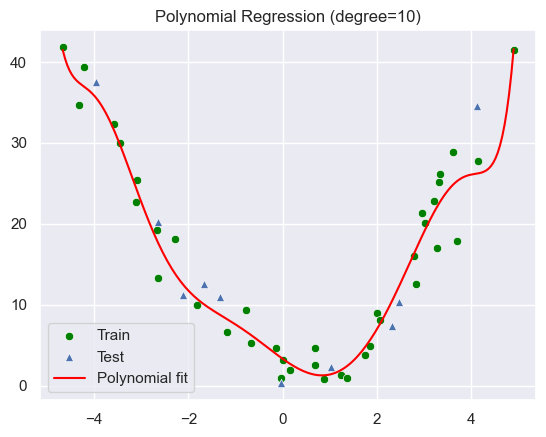

Train MSE: 6.3221
Test MSE: 11.6471


In [134]:
# with degree 10

model, poly = train_polynomial_regression(x_train, y_train, degree=10)

plot_polynomial_regression(x_train, y_train, x_test, y_test, model, poly)

For degree 10:
* train mse is very low compared to test mse
* both mse are low -> model overfits

Overfitted models has high weights

In [138]:
get_weights(model=model)

Model weights are 
-4.1534 1.0535 1.1872 0.0848 -0.1338 0.0136 0.0058 -0.0017 -0.0001 0.0 
Model intercept:
3.3231361557893138


### Poly reg with Degree 40

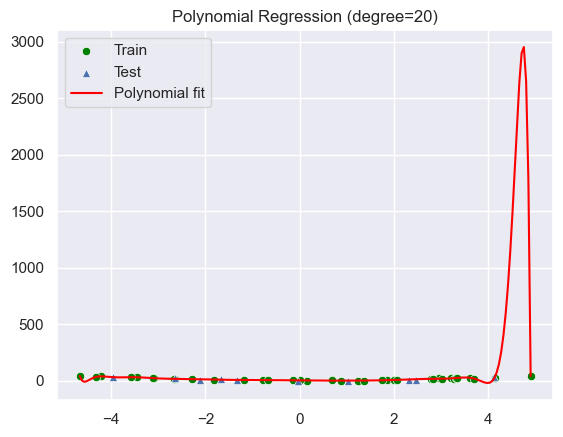

Train MSE: 4.0900
Test MSE: 21.3698


In [144]:
model, poly = train_polynomial_regression(x_train, y_train, degree=20)

plot_polynomial_regression(x_train, y_train, x_test, y_test, model, poly)

Model is overfitted highly

In [145]:
get_weights(model=model)

Model weights are 
-3.8285 0.6351 0.4876 0.269 1.6175 -0.4825 -1.3536 0.3287 0.4647 -0.0853 -0.0835 0.0107 0.0085 -0.0007 -0.0005 0.0 0.0 -0.0 -0.0 -0.0 
Model intercept:
3.5165589823415537


## Reguralizaton 

### L2 - regularization (Ridge)

L2 regularization, also known as Ridge regularization, is a machine learning technique that prevents overfitting by adding a penalty term to the model's loss function, proportional to the squares of the model's weights

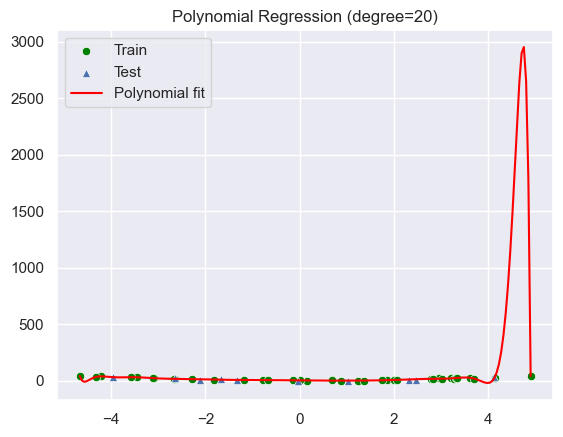

Train MSE: 4.0900
Test MSE: 21.3698


In [147]:
model_20, poly_20 = train_polynomial_regression(x_train, y_train, degree=20)

plot_polynomial_regression(x_train, y_train, x_test, y_test, model_20, poly_20)

In [158]:
x_poly20 = poly_20.transform(x_train)

ridge_model = Ridge(alpha=10)
ridge_model.fit(x_poly20, y_train)

d:\srinivas\trainee-assignment-2025\training_venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.4002e-27): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Ridge(alpha=10)

In [159]:
# train error and test error

y_train_pred = ridge_model.predict(x_poly20)
y_test_pred = ridge_model.predict(poly_20.transform(x_test))

print(f"Train error (ridge, alpha = 10): {mean_squared_error(y_train, y_train_pred)}")
print(f"Test error (ridge, alpha = 10): {mean_squared_error(y_test, y_test_pred)}")

Train error (ridge, alpha = 10): 4.518641119473623
Test error (ridge, alpha = 10): 19.424211305643222


We can observe that, test error decreases some extent

In [160]:
# poly weights

get_weights(model_20)

Model weights are 
-3.8285 0.6351 0.4876 0.269 1.6175 -0.4825 -1.3536 0.3287 0.4647 -0.0853 -0.0835 0.0107 0.0085 -0.0007 -0.0005 0.0 0.0 -0.0 -0.0 -0.0 
Model intercept:
3.5165589823415537


In [161]:
# ridge weights

get_weights(ridge_model)

Model weights are 
-0.6873 0.0835 -0.3989 -0.0082 -0.1804 0.0821 -0.1082 0.0767 0.1213 -0.0309 -0.0328 0.0041 0.0041 -0.0002 -0.0003 0.0 0.0 0.0 -0.0 -0.0 
Model intercept:
3.624083731158567


By comparing, we can observe the decreasing of weights

### L1 - regularization (Lasso)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in machine learning to prevent overfitting and improve model generalization by adding a penalty term to the model's loss function. 

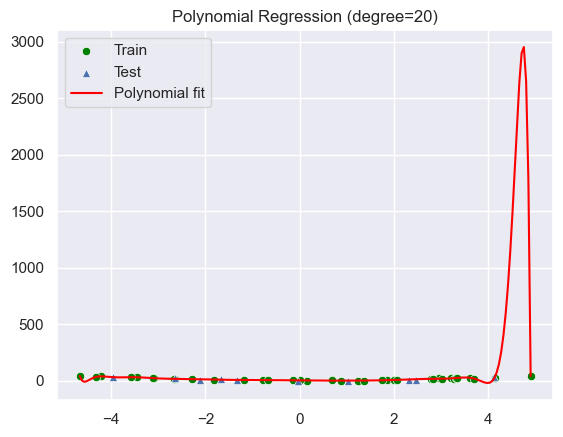

Train MSE: 4.0900
Test MSE: 21.3698


In [162]:
model_20, poly_20 = train_polynomial_regression(x_train, y_train, degree=20)

plot_polynomial_regression(x_train, y_train, x_test, y_test, model_20, poly_20)

In [163]:
x_train_poly20 = poly_20.transform(x_train)
x_test_poly20 = poly_20.transform(x_test)

In [164]:
lasso_reg = Lasso(alpha=3)
lasso_reg.fit(x_train_poly20, y_train)

d:\srinivas\trainee-assignment-2025\training_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.083e+02, tolerance: 5.795e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=3)

In [ ]:
# train error and test error

y_train_pred = ridge_model.predict(x_train_poly20)
y_test_pred = ridge_model.predict(x_test_poly20)

print(f"Train error (lasso, alpha = 3): {mean_squared_error(y_train, y_train_pred)}")
print(f"Test error (lasso, alpha = 3): {mean_squared_error(y_test, y_test_pred)}")

Train error (ridge, alpha = 10): 4.518641119473623
Test error (ridge, alpha = 10): 19.424211305643222


can observe that
* with low alpha comparatively, lasso controls same overfitting issue than ridge regeression
* Also it can does the feature selection

In [166]:
get_weights(model_20)

Model weights are 
-3.8285 0.6351 0.4876 0.269 1.6175 -0.4825 -1.3536 0.3287 0.4647 -0.0853 -0.0835 0.0107 0.0085 -0.0007 -0.0005 0.0 0.0 -0.0 -0.0 -0.0 
Model intercept:
3.5165589823415537


In [167]:
get_weights(lasso_reg)

Model weights are 
-0.0 0.0 -0.0 0.3107 -0.0096 -0.0097 -0.0 -0.0002 0.0 -0.0 0.0 0.0 0.0 0.0 -0.0 0.0 -0.0 0.0 -0.0 0.0 
Model intercept:
3.810398834705474


Can observe that, it gives sparced data